In [4]:
import pandas as pd
import numpy as np
import itertools

In [5]:


df = pd.read_spss('data.sav')


The following code is the extraction of the questions from the original data set

In [74]:
answers = []
for col in df.columns:
    
    answersforcol =[]
    count = 0
    for i in df[col]:
        i=str(i)
        if i not in answersforcol and not i.isdigit() and "." not in i:#is digit removes ints . removes floats if someones put a . in there written answer fuckem
            answersforcol.append(i)
    
        if i not in answers and not i.isdigit() and "." not in i:
            answers.append(i)
        count+=1
        if count > 300:
            break
    #print("potential answers for "+str(col))
    #print(answersforcol)

#print("total list of answers:")
#print(answers)
#prefixes = ['Fairly likely','Very likely','Very unlikely', 'Fairly unlikely',"Don't know",'Neither likely nor unlikely','A little','Not at all','Not very strong', 'nan', 'Very strong', 'Fairly strong', "Don't know"]



In [6]:
economy_list = ['deficitReduce','overseasAid','changeEconomy','econGenRetro','econPersonalRetro','economyResponsible','selfPriorities_econ']
enviornment_list = ['climateChange','enviroGrowth','selfPriorities_environment']
immig_list = ['immigCultural','immigSelf','changeImmig','immigEcon','controlImmig']
health_list = ['selfPriorities_nhs','effectsEUNHS','changeNHS']
brexit_list = ['EUIntegrationSelf','cantLiveWithEU_1','cantLiveWithEU_2','cantLiveWithEU_3','cantLiveWithEU_4','selfPriorities_brexit','euRefVote','dealVremain','remainVnodeal','effectsEUUnemployment','effectsEUTrade','effectsEUImmigration','effectsEUTerror','effectsEUEcon','dealGoodBad','happyEULeave','euID','euRefDoOver','cancelBrexit']

In [7]:
total_list = [economy_list,enviornment_list,immig_list,health_list,brexit_list]
flat_list = [item for l in total_list for item in l]
flat_list.insert(0,'partyId')
print(flat_list)


['partyId', 'deficitReduce', 'overseasAid', 'changeEconomy', 'econGenRetro', 'econPersonalRetro', 'economyResponsible', 'selfPriorities_econ', 'climateChange', 'enviroGrowth', 'selfPriorities_environment', 'immigCultural', 'immigSelf', 'changeImmig', 'immigEcon', 'controlImmig', 'selfPriorities_nhs', 'effectsEUNHS', 'changeNHS', 'EUIntegrationSelf', 'cantLiveWithEU_1', 'cantLiveWithEU_2', 'cantLiveWithEU_3', 'cantLiveWithEU_4', 'selfPriorities_brexit', 'euRefVote', 'dealVremain', 'remainVnodeal', 'effectsEUUnemployment', 'effectsEUTrade', 'effectsEUImmigration', 'effectsEUTerror', 'effectsEUEcon', 'dealGoodBad', 'happyEULeave', 'euID', 'euRefDoOver', 'cancelBrexit']


In [42]:
extracted_data = df.loc[:,flat_list]
extracted_data.columns= extracted_data.columns.str.strip().str.lower()

In [56]:
extracted_data.to_csv('extractd_data.csv')

This section of code is preparing the data for use with k-modes, to see how the data clusters initially - K-modes uses a dissimalarity method

In [9]:
from sklearn import preprocessing

In [82]:
extracted_data.info()


#seeing the data types we have extracted and their ammount of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34366 entries, 0 to 34365
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   partyid                     34366 non-null  category
 1   deficitreduce               8647 non-null   category
 2   overseasaid                 34366 non-null  category
 3   changeeconomy               34366 non-null  category
 4   econgenretro                34366 non-null  category
 5   econpersonalretro           34366 non-null  category
 6   economyresponsible          34366 non-null  category
 7   selfpriorities_econ         8663 non-null   category
 8   climatechange               8488 non-null   category
 9   envirogrowth                34366 non-null  category
 10  selfpriorities_environment  8663 non-null   category
 11  immigcultural               34366 non-null  category
 12  immigself                   34366 non-null  category
 13  changeimmig     

In [76]:
extracted_data.isna().sum()

partyId                           0
deficitReduce                 25719
overseasAid                       0
changeEconomy                     0
econGenRetro                      0
econPersonalRetro                 0
economyResponsible                0
selfPriorities_econ           25703
climateChange                 25878
enviroGrowth                      0
selfPriorities_environment    25703
immigCultural                     0
immigSelf                         0
changeImmig                       0
immigEcon                         0
controlImmig                      0
selfPriorities_nhs            25703
effectsEUNHS                      0
changeNHS                         0
EUIntegrationSelf                 0
cantLiveWithEU_1                  0
cantLiveWithEU_2                  0
cantLiveWithEU_3                  0
cantLiveWithEU_4                  0
selfPriorities_brexit         25703
euRefVote                       325
dealVremain                     557
remainVnodeal               

So we want to replace each of the NaN values with an unambiguous category, for example Don't know or impartial.... This has to be done manually for each value with a NaN 

In [87]:
extracted_data.loc[:,'selfPriorities_brexit']


0        Don't know
1        Don't know
2               Yes
3                No
4        Don't know
            ...    
34361    Don't know
34362            No
34363    Don't know
34364           Yes
34365    Don't know
Name: selfPriorities_brexit, Length: 34366, dtype: category
Categories (3, object): ['Don't know', 'No', 'Yes']

This example is explained, we find the categories available and choose one that can be a fitting replacement for the NaN and we then replace it with the fillna command

In [94]:
extracted_data['selfPriorities_brexit']=extracted_data['selfPriorities_brexit'].fillna("Don't know")
print(extracted_data['selfPriorities_brexit'].isna().sum())
#now we can see that all the NaN values have been replaced, we then need to continue with this for each of the variables containing NaNs

0


In [96]:
extracted_data['deficitReduce'] = extracted_data['deficitReduce'].fillna("Don't know")

In [100]:
extracted_data['selfPriorities_econ'] = extracted_data['selfPriorities_econ'].fillna("Don't know")


In [102]:
extracted_data['climateChange'] =  extracted_data['climateChange'].fillna("Don't know")

In [105]:
extracted_data['selfPriorities_environment'] = extracted_data['selfPriorities_environment'].fillna("Don't know")

In [107]:
extracted_data['selfPriorities_nhs'] = extracted_data['selfPriorities_nhs'].fillna("Don't know")

In [109]:
extracted_data['euRefVote'] = extracted_data['euRefVote'].fillna("Don't know")

In [17]:
extracted_data['dealVremain'] = extracted_data['dealVremain'].fillna("Don't know")

In [120]:
extracted_data['remainVnodeal'] = extracted_data['remainVnodeal'].replace(9999.0, "Don't know") 
extracted_data['remainVnodeal'] = extracted_data['remainVnodeal'].fillna("Don't know")


In [12]:
for col in extracted_data.columns:
    try:
        extracted_data[col] = extracted_data[col].fillna("Don't know")#we should centre our numerical stuff about 0
    except:
        print(col)

economyresponsible
remainvnodeal


Now we have no NaN values as evidenced bellow

In [13]:
extracted_data.isna().sum()

partyid                           0
deficitreduce                     0
overseasaid                       0
changeeconomy                     0
econgenretro                      0
econpersonalretro                 0
economyresponsible                0
selfpriorities_econ               0
climatechange                     0
envirogrowth                      0
selfpriorities_environment        0
immigcultural                     0
immigself                         0
changeimmig                       0
immigecon                         0
controlimmig                      0
selfpriorities_nhs                0
effectseunhs                      0
changenhs                         0
euintegrationself                 0
cantlivewitheu_1                  0
cantlivewitheu_2                  0
cantlivewitheu_3                  0
cantlivewitheu_4                  0
selfpriorities_brexit             0
eurefvote                         0
dealvremain                       0
remainvnodeal               

Now some data exploration of the representation of each party, as well as seeing how the questions may split each of them up

In [14]:
answers = []
for col in extracted_data.columns:
    
    answersforcol =[]
    count = 0
    for i in extracted_data[col]:
        i=str(i)
        if i not in answersforcol and not i.isdigit() and "." not in i:#is digit removes ints . removes floats if someones put a . in there written answer fuckem
            answersforcol.append(i)
    
        if i not in answers and not i.isdigit() and "." not in i:
            answers.append(i)
        count+=1
        if count > 300:
            break
    print("potential answers for "+str(col))
    print(answersforcol)

print("total list of answers:")
print(answers)


potential answers for partyid
['Labour', 'No - none', 'Liberal Democrat', 'Conservative', 'Plaid Cymru', 'Brexit Party', "Don't know", 'Green Party', 'Scottish National Party (SNP)', 'Other']
potential answers for deficitreduce
["Don't know", 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable', 'It is completely necessary', 'It is completely unnecessary']
potential answers for overseasaid
['Disagree', 'Neither agree nor disagree', 'Strongly agree', 'Agree', 'Strongly disagree', "Don't know"]
potential answers for changeeconomy
['Getting a lot worse', 'Staying about the same', 'Getting a little worse', 'Getting a lot better', "Don't know", 'Getting a little better']
potential answers for econgenretro
['Got a little worse', 'Stayed the same', 'Got a lot worse', "Don't know", 'Got a little better']
potential answers for econpersonalretro
['Got a little worse', 'Stayed the same', "Don't know", 'Got a little better', 'Got a lot worse', 'Got a lot

In [15]:
#manually sort prefixes
prefixes = [['nan','It is completely necessary', 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable', "Don't know",  'It is completely unnecessary'],
['Strongly disagree','Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree',  "Don't know"]]

def listoverlap(list1,list2):
    for i in list1:
        if i in list2:
            
            return True
    return False


In [31]:
linguisticprefixes = ['Strongly',"much","lot","little","bad","good","very","extremely","neither","higher","lower","moderate","absolutely", 'worse', 'better', 'about the same','A little']
problemwords = ["not","disagree"]
for i in range(len(linguisticprefixes)):
    linguisticprefixes[i]=linguisticprefixes[i].lower()

answersnopre = []
for i in answers:
    i = str(i)
    i=i.lower()
    contains = False
    for k in linguisticprefixes:
        if k in i:
            contains = True
    if not contains:
        
        answersnopre.append(i)
    
        

In [32]:
#sorts the collums
colnames = []
for i in extracted_data.columns:
    colnames.append(i)
    #print(i)

orderedcolumns = []
columnsneedmanualsorting = []
onehotable = colnames#assumes all can be 1 hotted in beggining
for col in colnames:
    
    count=0
    for i in extracted_data[col]:
        i=str(i).lower()
        
        if(listoverlap(i.split(),linguisticprefixes)):#checks for overlap between lists
            
            orderedcolumns.append(col)
            onehotable.remove(col)#if needs sorting cannot be 1 hotted
            break#break if found atleast one instance of words that need ordering
        count+=1
        if count> 1000:
            break


for col in orderedcolumns:
    for k in extracted_data[col]:
        k=str(k).lower()
        if listoverlap(k.split(),problemwords):
            orderedcolumns.remove(str(col))
            columnsneedmanualsorting.append(col)
            break
        
            #if data contains problem words algorithm wont work so we need to sort it manually
            #simplest example is not
            #very very good > very good
            #but very very very not good > very very good
            #could maybe solve with a -1 term somwhere seems to complicated though
                
            

print("can probably be sorted:")
print(orderedcolumns)
print("gonna require manual sorting:")
print(columnsneedmanualsorting)
print("can be 1 hot encoded:")
print(onehotable)



        

can probably be sorted:
['changeeconomy', 'econpersonalretro', 'changeimmig', 'controlimmig', 'effectseunhs', 'effectseuunemployment', 'effectseuimmigration', 'effectseuecon', 'happyeuleave']
gonna require manual sorting:
['deficitreduce', 'cancelbrexit']
can be 1 hot encoded:
['partyid', 'overseasaid', 'econgenretro', 'economyresponsible', 'selfpriorities_econ', 'climatechange', 'envirogrowth', 'selfpriorities_environment', 'immigcultural', 'immigself', 'immigecon', 'selfpriorities_nhs', 'changenhs', 'euintegrationself', 'cantlivewitheu_1', 'cantlivewitheu_2', 'cantlivewitheu_3', 'cantlivewitheu_4', 'selfpriorities_brexit', 'eurefvote', 'dealvremain', 'remainvnodeal', 'effectseutrade', 'effectseuterror', 'dealgoodbad', 'euid', 'eurefdoover']


In [34]:
onehotanswers = ["no - none"]

#print(linguisticprefixes)

arr = []
for col in onehotable:
    
    count = 0
    for k in extracted_data[col]:
        k=str(k)
        k=k.lower()
        count +=1
        #if(set(onehotanswers).isdisjoint(k.split())):
            #onehotanswers.append(k)
        if not listoverlap(k.split(),linguisticprefixes):

            #print(k)
            #print(col)   
            #arr.append((k,col))
            onehotanswers.append(k)
        if count> 1000:
            break
onehotanswers = list(dict.fromkeys(onehotanswers))
#print(arr)
print("answers:")
print(onehotanswers)
#these can be done using scikit label thing

#check this for stuff needed to be added to linguistic prefixes

answers:
['no - none', 'labour', 'liberal democrat', 'conservative', 'plaid cymru', 'brexit party', "don't know", 'green party', 'scottish national party (snp)', 'other', 'united kingdom independence party (ukip)', 'disagree', 'agree', 'stayed the same', 'a great deal', 'don\x92t know', 'not at all', 'yes', 'no', 'climate changing due to human activity', 'climate not changing', 'climate changing but not due to human activity', '8', 'protecting the environment should have priority', '1', '6', '5', '9', '7', '2', 'economic growth should have priority', '3', '4', 'enriches cultural life', 'undermines cultural life', 'allow many fewer', 'allow many more', 'staying about the same', 'unite fully with the european union', 'protect our independence', 'acceptable', 'unacceptable', 'stay/remain in the eu', 'leave the eu', 'i would/will not vote', 'remain in the eu', "the government's withdrawal deal", 'i would not vote', 'nan', 'leave without a deal', '9999.0', 'about the same', 'the remain side

In [50]:
linguisticprefixes = ['Strongly',"much","lot","little","bad","good","very","extremely","neither","higher","lower","moderate","absolutely", 'worse', 'better', 'about the same']
lmultipliers = ['Strongly',"much","lot","extremely","very","extremely","absolutely"]#strong multipliers
#could split strong multipliers theres never more then 1 in a 
smultipliers = ["little"]#weak multipliers

posadd =["good","better"]#map to 0>
negadd = ["bad","lower","worse"]#map to 0<
zadd =["about the same"]#map to 0

# linguisticprefixes = lmultipliers+smultiplier+posadd+zadd



In [52]:
extracted_data.columns= extracted_data.columns.str.strip().str.lower()
for i in extracted_data.columns:
    print(i)
newcols = []
for i in orderedcolumns:
    newcols.append(str(i).strip().lower())
orderedcolumns = newcols
orderable = extracted_data[orderedcolumns].copy()
y = 0
newdf = pd.DataFrame()
for col in orderable.columns:    
    x=0
    for i in col:
        val=1
        i = str(i).lower().split()
        if listoverlap(i,zadd):
            val = 0
        if listoverlap(i,posadd):
            val +=2
        if listoverlap(i,negadd):
            val -=2          
        if listoverlap(i,lmultipliers):
            val = val*2
        if listoverlap(i,smultipliers):
            val = val*1/2
    newdf.values[x,y] = val 
    x+=1
y+=1

newdf.to_csv()
    

partyid
deficitreduce
overseasaid
changeeconomy
econgenretro
econpersonalretro
economyresponsible
selfpriorities_econ
climatechange
envirogrowth
selfpriorities_environment
immigcultural
immigself
changeimmig
immigecon
controlimmig
selfpriorities_nhs
effectseunhs
changenhs
euintegrationself
cantlivewitheu_1
cantlivewitheu_2
cantlivewitheu_3
cantlivewitheu_4
selfpriorities_brexit
eurefvote
dealvremain
remainvnodeal
effectseuunemployment
effectseutrade
effectseuimmigration
effectseuterror
effectseuecon
dealgoodbad
happyeuleave
euid
eurefdoover
cancelbrexit


IndexError: index 0 is out of bounds for axis 0 with size 0

In [143]:
list_unique_parites = extracted_data['partyId'].unique()
list_unique_parties = list(list_unique_parites)
party_sums = []
for i in range(len(list_unique_parites)):
    count = 0 
    for x in (extracted_data['partyId'] == list_unique_parites[i]):
        if x == True:
            count += 1
    party_sums.append(count)
        

In [159]:
party_data = {'Parties':list_unique_parites,'Count':party_sums}
data_parties = pd.DataFrame(party_data)


In [162]:
percentages =[]
for i in data_parties['Count']:
    percentages.append(int(i)/data_parties.sum()*100)

data_parties['Percentages']= percentages
data_parties

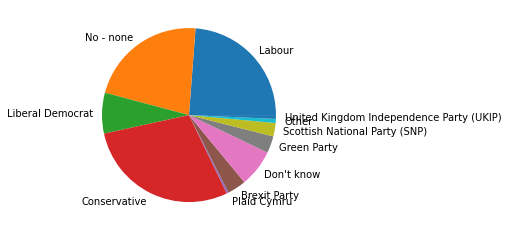

<Figure size 432x288 with 0 Axes>

In [170]:
import matplotlib.pyplot as plt
plt.pie(data_parties['Count'],labels = data_parties['Parties'],shadow = False)
plt.figure(facecolor="white")
plt.show()

K-prototype clustering

In [202]:
k_modes_data = extracted_data.drop(['partyId','enviroGrowth','immigCultural','immigSelf','immigEcon','EUIntegrationSelf','happyEULeave'],axis=1)

In [204]:
k_modes_data_matrix = k_modes_data.to_numpy()



In [206]:
from kmodes.kmodes import KModes

In [207]:
cost = []
for cluster in range(1, 11):
    kmodes = KModes(n_clusters = cluster, init = 'Huang', random_state = 0)
    kmodes.fit_predict(k_modes_data_matrix)
    cost.append(kmodes.cost_)
    print('Cluster initiation: {}'.format(cluster))
  
print(len(cost))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
10


In [208]:
df_cost = pd.DataFrame({'Cluster': range(1, 11), 'Cost': cost})

In [210]:
from plotnine import *
import plotnine

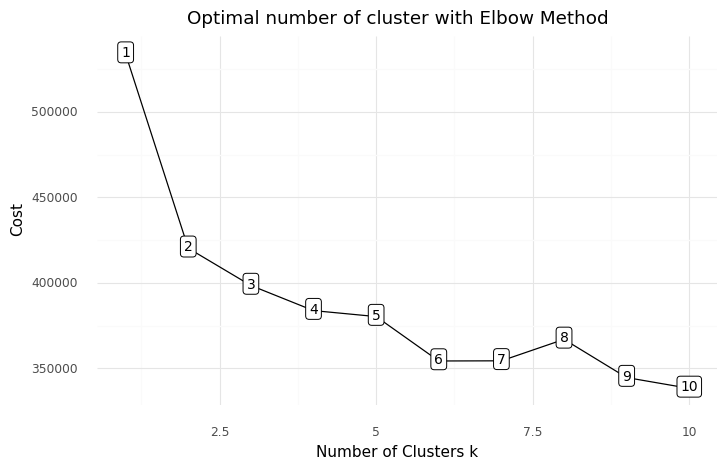

<ggplot: (132833703900)>

In [211]:

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [212]:
kmodes = KModes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)
kmodes.fit_predict(k_modes_data_matrix)

array([0, 4, 0, ..., 2, 0, 4], dtype=uint16)

In [256]:
extracted_data['Cluster Labels'] = kmodes.labels_


In [234]:
assignments_cluster_0 =[]
assignments_cluster_1 =[]
assignments_cluster_2 =[]
assignments_cluster_3 =[]
assignments_cluster_4 =[]
assignments_cluster_5 =[]
for x in range(len(extracted_data['partyId'])):
    if extracted_data.loc[x,'Cluster Labels'] == 0:
        assignments_cluster_0.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 1:
        assignments_cluster_1.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 2:
        assignments_cluster_2.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 3:
        assignments_cluster_3.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 4:
        assignments_cluster_4.append(extracted_data.loc[x,'partyId'])
    else:
        assignments_cluster_5.append(extracted_data.loc[x,'partyId'])
    
    
        
    

In [255]:
Cluster1 = pd.DataFrame({'Assignments': assignments_cluster_5})
Cluster1['Assignments'].value_counts()


Labour                                      2105
No - none                                    827
Liberal Democrat                             600
Green Party                                  336
Scottish National Party (SNP)                290
Conservative                                 219
Don't know                                   200
Other                                         50
Plaid Cymru                                   33
Brexit Party                                   8
United Kingdom Independence Party (UKIP)       3
Name: Assignments, dtype: int64